In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import numpy as np

import csv
with open('/content/drive/My Drive/regression dataset.csv') as file:
  csvreader=csv.reader(file)
  x=[]
  y=[]
  for row in csvreader:
    x.append([1]+list(map(float,row[:-1])))
    y.append(float(row[-1]))
X=np.array(x).T
Y=np.array(y).reshape(len(y),1)
  

In [112]:
def split_data(x,y,k):
  l=len(y)//k
  A=list(zip(x,y))
  data=[]
  for i in range(k-1):
    data.append(A[i*l:(i+1)*l])
  data.append(A[(k-1)*l:])
  return data



#print(list(zip(x,y)))
def k_fold(data,k):
  x_train=[]
  y_train=[]
  for i in range(len(data)):
    if i==k:
      a=[i for i,j in data[i]]
      b=[j for i,j in data[i]]
      x_test=a
      y_test=b
      
    else:
      a=[i for i,j in data[i]]
      b=[j for i,j in data[i]]
      x_train+=a
      y_train+=b
  x_train=np.array(x_train).T
  y_train=np.array(y_train).reshape(len(y_train),1)
  x_test=np.array(x_test).T
  y_test=np.array(y_test).reshape(len(y_test),1)
  return x_train,y_train,x_test,y_test
  

# arr = arr - arr.mean(axis=0)
# arr = arr / np.abs(arr).max(axis=0)

In [113]:
A=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18],[19,20]]
B=[-1,-3,-5,-7,-9,-11,-13,-15,-17,-19]
k=3
data=split_data(A,B,k)
x_train,y_train,x_test,y_test=k_fold(data,0) # ki value varies from 0 to k-1
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[ 7  9 11 13 15 17 19]
 [ 8 10 12 14 16 18 20]]
[[ -7]
 [ -9]
 [-11]
 [-13]
 [-15]
 [-17]
 [-19]]
[[1 3 5]
 [2 4 6]]
[[-1]
 [-3]
 [-5]]


In [114]:
k=5
data=split_data(x,y,k)
x_train,y_train,x_test,y_test=k_fold(data,1) # ki value varies from 0 to k-1
print(x_train[:,:10])
print(y_train[:10])
print(x_test[:,:10])
print(y_test[:10])
# print()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

[[ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 7.185  6.998  7.147  6.43   6.012  6.172  5.631  6.004  6.377  6.009]
 [ 4.03   2.94   5.33   5.21  12.43  19.15  29.93  17.1   20.45  13.27 ]
 [17.8   18.7   18.7   18.7   15.2   15.2   15.2   15.2   15.2   15.2  ]]
[[7.287]
 [7.014]
 [7.602]
 [6.027]
 [4.809]
 [5.691]
 [3.465]
 [3.969]
 [3.15 ]
 [3.969]]
[[ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 7.416  6.727  6.781  6.405  6.137  6.167  5.851  5.836  6.127  6.474]
 [ 6.19   9.42   7.67  10.63  13.44  12.33  16.47  18.66  14.09  12.27 ]
 [18.    20.9   20.9   20.9   20.9   20.9   20.9   20.9   20.9   20.9  ]]
[[6.972]
 [5.775]
 [5.565]
 [3.906]
 [4.053]
 [4.221]
 [4.095]
 [4.095]
 [4.284]
 [4.158]]
(4, 390)
(390, 1)
(4, 97)
(97, 1)


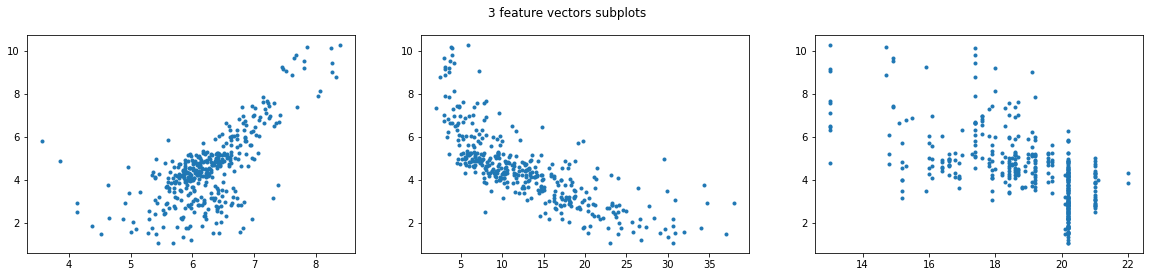

In [115]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4)) # row , column
fig.suptitle('3 feature vectors subplots')
ax1.plot(x_train[1,:],y_train[:],".")
ax2.plot(x_train[2,:],y_train[:],".")
ax3.plot(x_train[3,:],y_train[:],".")

In [116]:
#NORMALIZATION
class Normalization:
  def __init__(self,x_train,y_train,x_test,y_test):
    self.avg_x=x_train.mean(axis=1).reshape(4,1)
    self.max_x=np.abs(x_train).max(axis=1).reshape(4,1)
    self.avg_y=y_train.mean(axis=0).reshape(1,1)
    self.max_y=np.abs(y_train).max(axis=0).reshape(1,1)
  def Normalize(self,x_train,y_train,x_test,y_test):
    x_train=(x_train-self.avg_x)/self.max_x
    y_train=(y_train-self.avg_y)/self.max_y
    x_test=(x_test-self.avg_x)/self.max_x
    y_test=(y_test-self.avg_y)/self.max_y
    return x_train,y_train,x_test,y_test
  def DeNormalize(self,x_train,y_train,x_test,y_test):
    x_train=x_train*self.max_x+self.avg_x
    y_train=x_train*self.max_y+self.avg_y
    x_test=x_test*self.max_x+self.avg_x
    y_test=y_test*self.max_y+self.avg_y
    return x_train,y_train,x_test,y_test

In [117]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    # write your code here
    w=w_old+2*lr*(x@(y-x.T@w_old))/len(y)
    #w=w_old+2*lr*np.dot(x,(y-np.dot(np.transpose(x),w_old)))/len(y)
    #print(w) # to see if w is overshooting
    return w

  def error(self,w,y,x):
    return sum((np.dot(np.transpose(x),w)-y)**2)/len(y) # write your code here

  def mat_inv(self,y,x_aug):
    return np.dot(np.dot(np.linalg.inv(np.dot(x_aug,np.transpose(x_aug))),x_aug),y)# write your code here
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w=np.random.randn(m,1)
    err=[]
    for _ in range(1000):
      err.append(self.error(w,y,x))
      w=self.grad_update(w,lr,y,x)
    w_pred=w
    # write your code here

    return w_pred,err
  def regression_k_fold_triple_feature(self,x,y,lr,K):
    data=split_data(x,y,K)
    for i in range(K):
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      w_pred,_=self.Regression_grad_des(x_train,y_train,lr)
      print("fold number: " ,i+1)
      plt.figure()
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4)) # row , column
      ax1.plot(x_train.T[:,1],y_train,"x")
      ax1.plot(np.ravel(x_train.T[:,1]),np.ravel(x_train.T@w_pred),".")
      ax2.plot(x_train.T[:,2],y_train,"x")
      ax2.plot(np.ravel(x_train.T[:,2]),np.ravel(x_train.T@w_pred),".")
      ax3.plot(x_train.T[:,3],y_train,"x")
      ax3.plot(np.ravel(x_train.T[:,3]),np.ravel(x_train.T@w_pred),".")
      error1=reg.error(w_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
      fig.suptitle("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))
      plt.show()
      print("---------------------------------------------------------------")
  def regression_k_fold_single_feature(self,x,y,lr,K):
    data=split_data(x,y,K)
    for i in range(K):
      print("fold number: " ,i+1)
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4)) # row , column

      x1=np.reshape(x_train[1,:],(1,x_train.shape[1]))
      x1_test=np.reshape(x_test[1,:],(1,x_test.shape[1]))
      x1=np.concatenate((np.ones((1,x1.shape[1])), x1),axis=0)
      x1_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test),axis=0)
      w_pred,_=self.Regression_grad_des(x1,y_train,lr)
      ax1.plot(x1.T[:,1],y_train,".")
      ax1.plot(np.ravel(x1.T[:,1]),np.ravel(x1.T@w_pred))
      error1=reg.error(w_pred,y_train,x1)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x1_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax1.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      x2=np.reshape(x_train[2,:],(1,x_train.shape[1]))
      x2_test=np.reshape(x_test[2,:],(1,x_test.shape[1]))
      x2=np.concatenate((np.ones((1,x2.shape[1])), x2),axis=0)
      x2_test=np.concatenate((np.ones((1,x2_test.shape[1])), x2_test),axis=0)
      w_pred,_=self.Regression_grad_des(x2,y_train,lr)
      ax2.plot(x2.T[:,1],y_train,".")
      ax2.plot(np.ravel(x2.T[:,1]),np.ravel(x2.T@w_pred))
      error1=reg.error(w_pred,y_train,x2)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x2_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax2.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      x3=np.reshape(x_train[3,:],(1,x_train.shape[1]))
      x3_test=np.reshape(x_test[3,:],(1,x_test.shape[1]))
      x3=np.concatenate((np.ones((1,x3.shape[1])), x3),axis=0)
      x3_test=np.concatenate((np.ones((1,x3_test.shape[1])), x3_test),axis=0)
      w_pred,_=self.Regression_grad_des(x3,y_train,lr)
      ax3.plot(x3.T[:,1],y_train,".")
      ax3.plot(np.ravel(x3.T[:,1]),np.ravel(x3.T@w_pred))
      error1=reg.error(w_pred,y_train,x3)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x3_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax3.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))
      # print(w_pred," for k=" ,i)

      plt.show()
      print("---------------------------------------------------------------")
  def regression_k_fold_double_feature(self,x,y,lr,K):
    data=split_data(x,y,K)
    for i in range(K):
      print("fold number: " ,i+1)
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      fig = plt.figure(figsize=(20,4))

      x1=np.reshape(x_train[1,:],(1,x_train.shape[1]))
      x1_test=np.reshape(x_test[1,:],(1,x_test.shape[1]))
      x2=np.reshape(x_train[2,:],(1,x_train.shape[1]))
      x2_test=np.reshape(x_test[2,:],(1,x_test.shape[1]))
      x3=np.reshape(x_train[3,:],(1,x_train.shape[1]))
      x3_test=np.reshape(x_test[3,:],(1,x_test.shape[1]))


      x12=np.concatenate((np.ones((1,x1.shape[1])), x1,x2),axis=0)
      x12_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test,x2_test),axis=0)
      x23=np.concatenate((np.ones((1,x2.shape[1])), x2,x3),axis=0)
      x23_test=np.concatenate((np.ones((1,x2_test.shape[1])), x2_test,x3_test),axis=0)
      x13=np.concatenate((np.ones((1,x1.shape[1])), x1,x3),axis=0)
      x13_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test,x3_test),axis=0)

      A=np.linspace(-0.3,0.3,100)
      A,B=np.meshgrid(A,A)

      w_pred,_=self.Regression_grad_des(x12,y_train,lr)
      ax1 = fig.add_subplot(131, projection='3d')
      ax1.plot3D(x12[1,:],x12[2,:],y_train[:,0],".")
      #A,B=np.meshgrid(x12[1,:],x12[2,:])
      C=w_pred[0]+w_pred[1]*A+w_pred[2]*B
      ax1.plot_surface(A,B,C,color='cyan')
      error1=reg.error(w_pred,y_train,x12)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x12_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax1.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      w_pred,_=self.Regression_grad_des(x23,y_train,lr)
      ax2 = fig.add_subplot(132, projection='3d')
      ax2.plot3D(x23[1,:],x23[2,:],y_train[:,0],".")
      #A,B=np.meshgrid(x23[1,:],x23[2,:])
      C=w_pred[0]+w_pred[1]*A+w_pred[2]*B
      ax2.plot_surface(A,B,C,color="cyan")
      error1=reg.error(w_pred,y_train,x23)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x23_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax2.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      w_pred,_=self.Regression_grad_des(x13,y_train,lr)
      ax3 = fig.add_subplot(133, projection='3d')
      ax3.plot3D(x13[1,:],x13[2,:],y_train[:,0],".")
      #A,B=np.meshgrid(x13[1,:],x13[2,:])
      C=w_pred[0]+w_pred[1]*A+w_pred[2]*B
      ax3.plot_surface(A,B,C,color="cyan")
      error1=reg.error(w_pred,y_train,x13)/((np.max(y_train)-np.mean(y_train))**2)
      error2=reg.error(w_pred,y_test,x13_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax3.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      plt.show()
      print("---------------------------------------------------------------")



fold number:  1


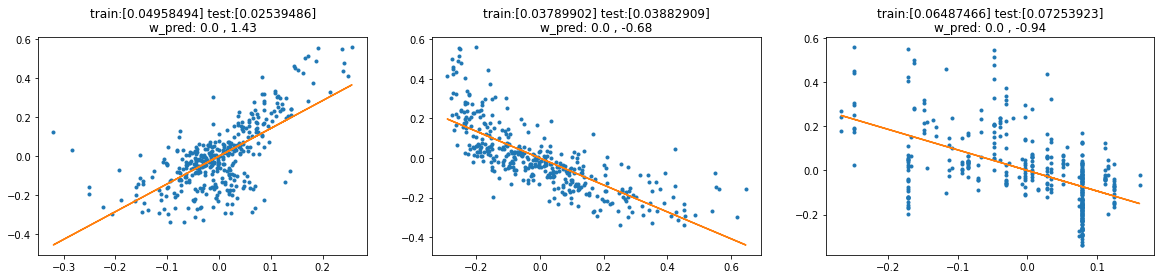

---------------------------------------------------------------
fold number:  2


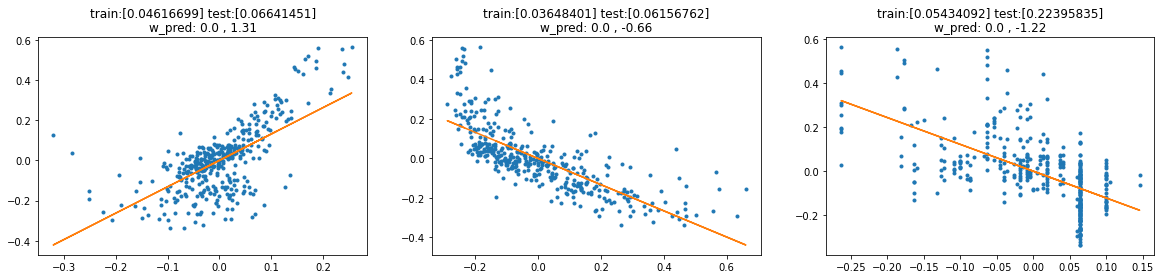

---------------------------------------------------------------
fold number:  3


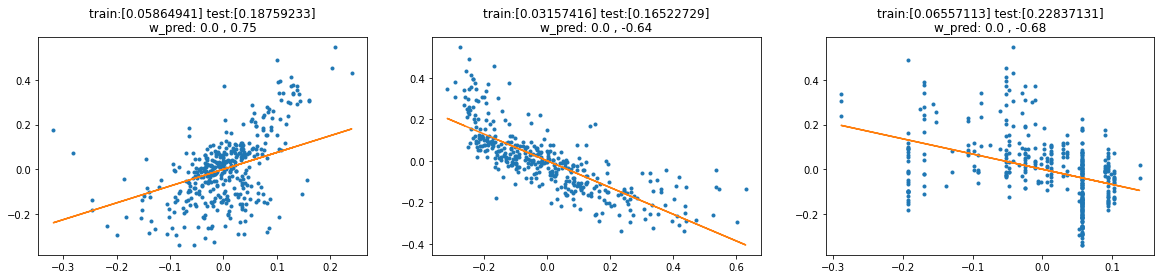

---------------------------------------------------------------
fold number:  4


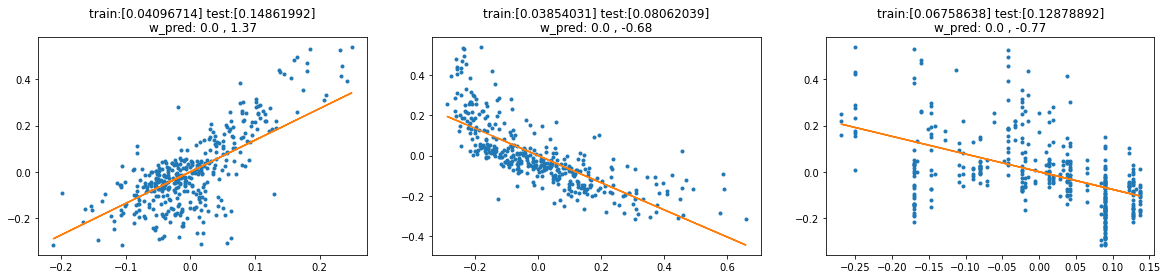

---------------------------------------------------------------
fold number:  5


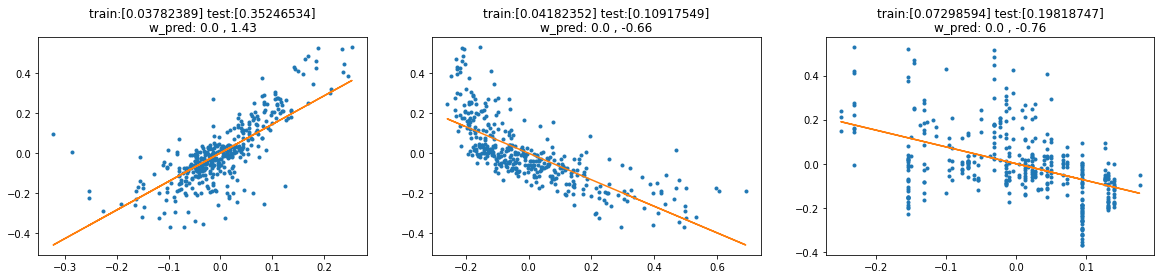

---------------------------------------------------------------


In [118]:
reg=regression()
reg.regression_k_fold_single_feature(x,y,0.2,5)

fold number:  1


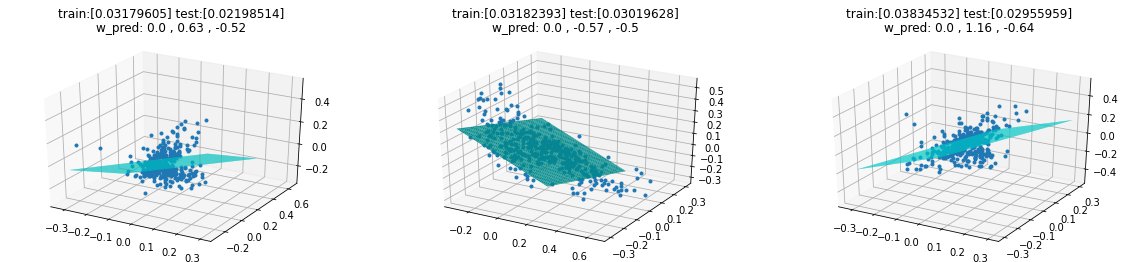

---------------------------------------------------------------
fold number:  2


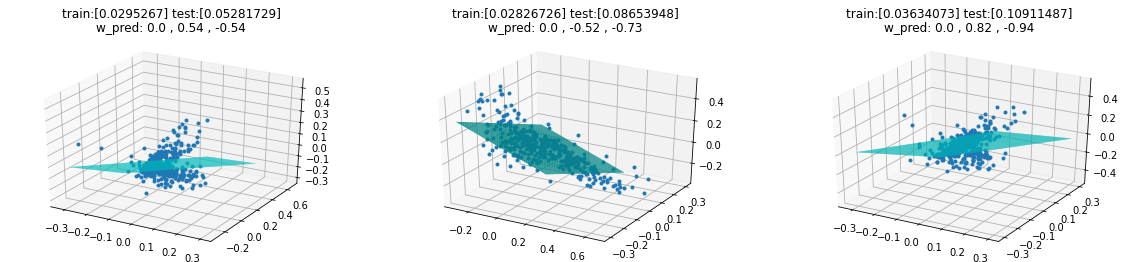

---------------------------------------------------------------
fold number:  3


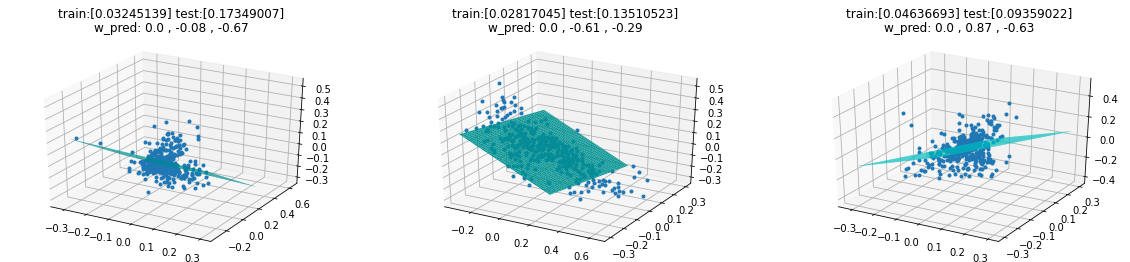

---------------------------------------------------------------
fold number:  4


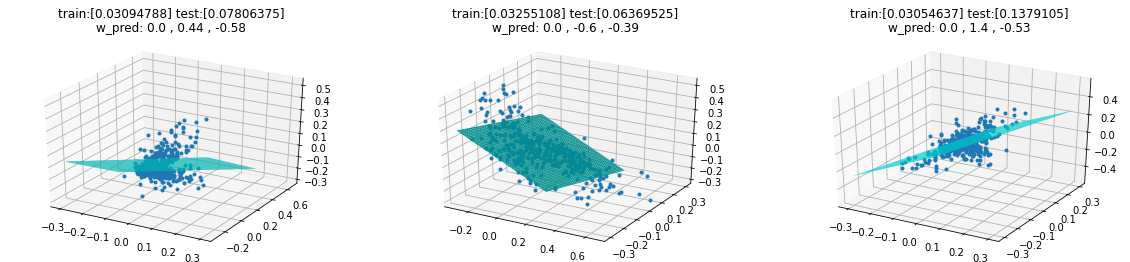

---------------------------------------------------------------
fold number:  5


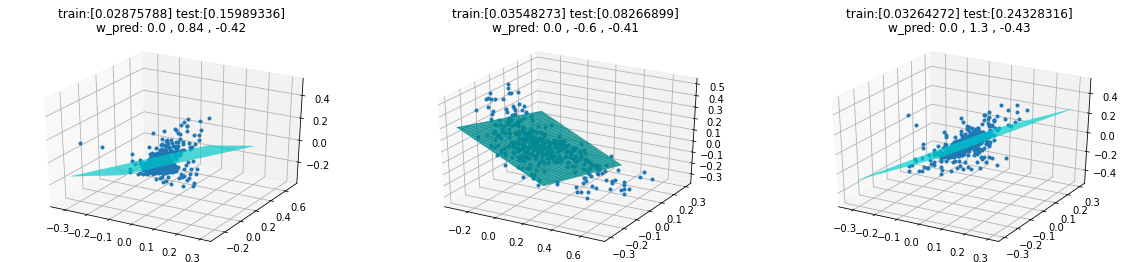

---------------------------------------------------------------


In [119]:
reg=regression()
reg.regression_k_fold_double_feature(x,y,0.2,5)

fold number:  1


<Figure size 432x288 with 0 Axes>

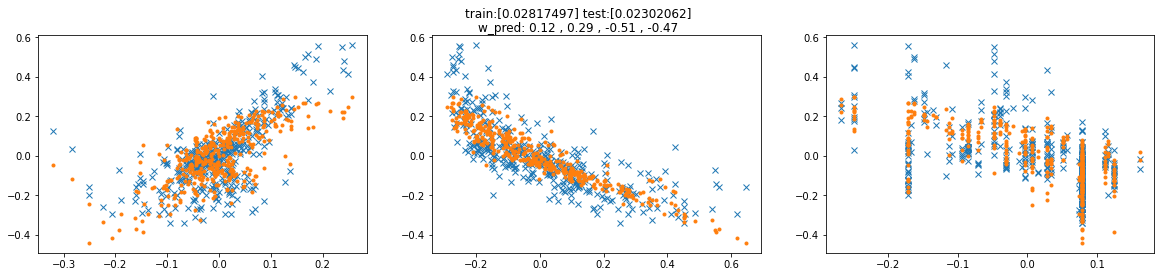

---------------------------------------------------------------
fold number:  2


<Figure size 432x288 with 0 Axes>

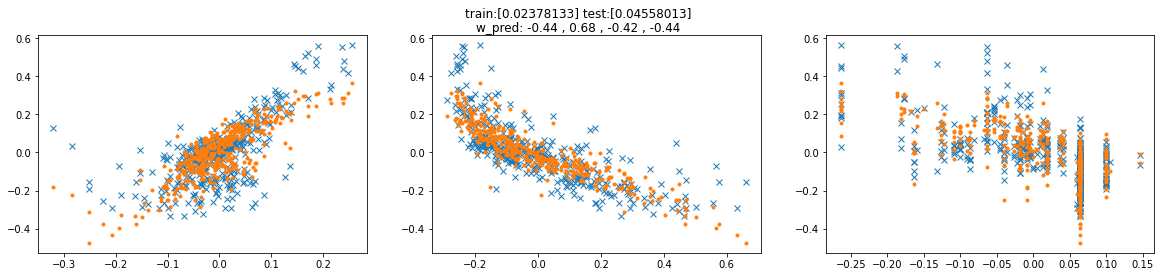

---------------------------------------------------------------
fold number:  3


<Figure size 432x288 with 0 Axes>

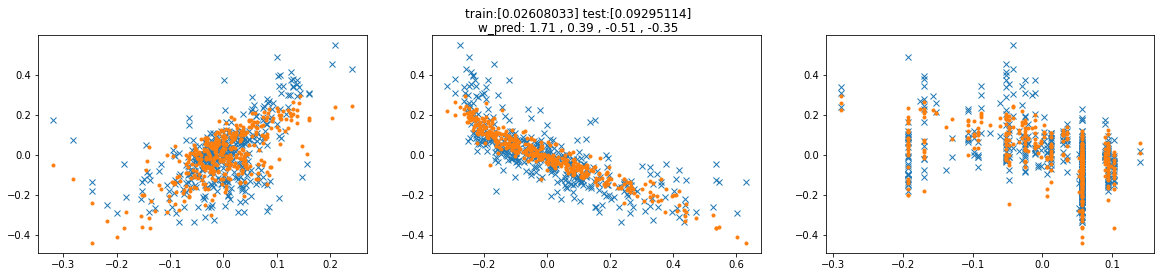

---------------------------------------------------------------
fold number:  4


<Figure size 432x288 with 0 Axes>

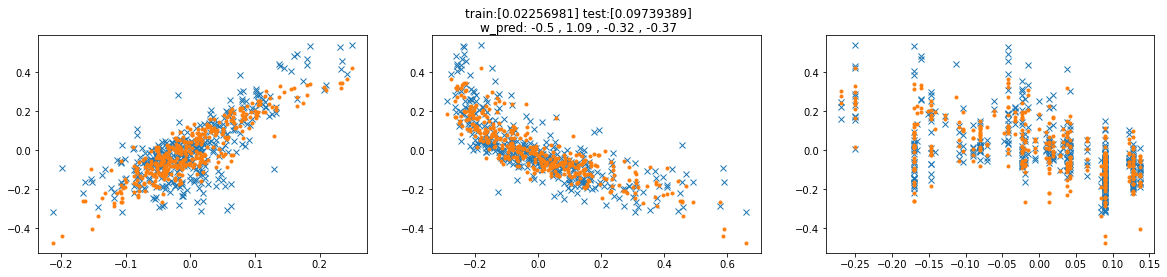

---------------------------------------------------------------
fold number:  5


<Figure size 432x288 with 0 Axes>

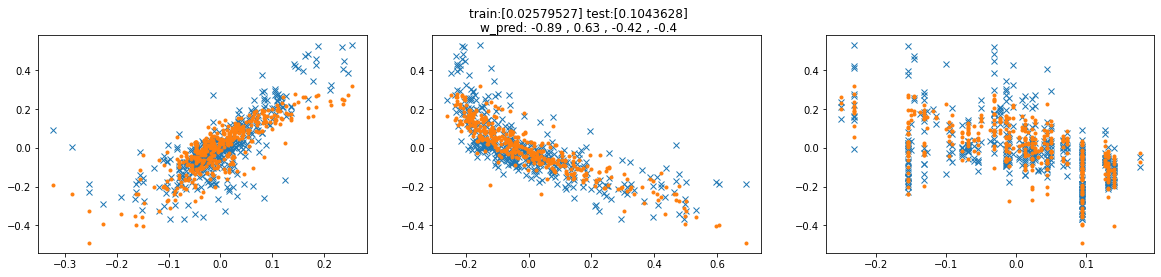

---------------------------------------------------------------


In [120]:
reg=regression()
reg.regression_k_fold_triple_feature(x,y,0.2,5)

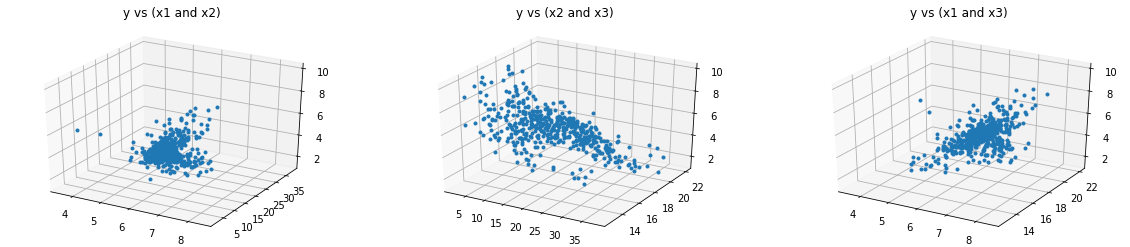

In [121]:
# Visualizing in 3D
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot3D(X[1,:],X[2,:],Y[:,0],".")
ax1.title.set_text("y vs (x1 and x2)")
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot3D(X[2,:],X[3,:],Y[:,0],".")
ax2.title.set_text("y vs (x2 and x3)")
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot3D(X[1,:],X[3,:],Y[:,0],".")
ax3.title.set_text("y vs (x1 and x3)")
plt.show()

In [122]:
def data_transform(X,degree): 
  X_new=np.array(np.ones((1,X.shape[1])))
  for x in X:
    a=np.array([x**i for i in range(1,degree+1)])
    X_new=np.concatenate((X_new,a),axis=0)
  return X_new


In [123]:
A=np.array([[1,2,3],[4,5,6]])
print(data_transform(A,3))

[[  1.   1.   1.]
 [  1.   2.   3.]
 [  1.   4.   9.]
 [  1.   8.  27.]
 [  4.   5.   6.]
 [ 16.  25.  36.]
 [ 64. 125. 216.]]


In [124]:
class poly_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    # write your code here
    w=w_old+2*lr*(x@(y-x.T@w_old))/len(y)
    #w=w_old+2*lr*np.dot(x,(y-np.dot(np.transpose(x),w_old)))/len(y)
    #print(w) # to see if w is overshooting
    return w

  def error(self,w,y,x):
    return sum((np.dot(np.transpose(x),w)-y)**2)/len(y) # write your code here

  def mat_inv(self,y,x_aug):
    return np.dot(np.dot(np.linalg.inv(np.dot(x_aug,np.transpose(x_aug))),x_aug),y)# write your code here
    # by Gradien descent
  def data_transform(self,X,degree):
    X_new=np.array(np.ones((1,X.shape[1])))
    for x in X[1:]:
      a=np.array([x**i for i in range(1,degree+1)])
      X_new=np.concatenate((X_new,a),axis=0)
    return X_new
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w=np.random.randn(m,1)
    err=[]
    for _ in range(1000):
      err.append(self.error(w,y,x))
      w=self.grad_update(w,lr,y,x)
    w_pred=w
    # write your code here

    return w_pred,err
  def regression_k_fold_triple_feature(self,x,y,lr,K,degree):
    data=split_data(x,y,K)
    for i in range(K):
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      x_train=self.data_transform(x_train,degree)
      x_test=self.data_transform(x_test,degree)
      #w_pred,_=self.Regression_grad_des(x_train,y_train,lr)
      w_pred=self.mat_inv(y_train,x_train)
      print("fold number: " ,i+1)
      plt.figure()
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4)) # row , column
      ax1.plot(x_train.T[:,0*degree+1],y_train,"x")
      ax1.plot(np.ravel(x_train.T[:,0*degree+1]),np.ravel(x_train.T@w_pred),".")
      ax2.plot(x_train.T[:,1*degree+1],y_train,"x")
      ax2.plot(np.ravel(x_train.T[:,1*degree+1]),np.ravel(x_train.T@w_pred),".")
      ax3.plot(x_train.T[:,2*degree+1],y_train,"x")
      ax3.plot(np.ravel(x_train.T[:,2*degree+1]),np.ravel(x_train.T@w_pred),".")
      error1=self.error(w_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
      fig.suptitle("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))
      plt.show()
      print("---------------------------------------------------------------")
  def regression_k_fold_single_feature(self,x,y,lr,K,degree):
    data=split_data(x,y,K)
    A=np.linspace(-0.3,0.3,100)
    A=np.array(A).reshape(1,len(A))
    A=np.concatenate((np.ones((1,A.shape[1])), A),axis=0)
    A=self.data_transform(A,degree)
    for i in range(K):
      print("fold number: " ,i+1)
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4)) # row , column

      x1=np.reshape(x_train[1,:],(1,x_train.shape[1]))
      x1_test=np.reshape(x_test[1,:],(1,x_test.shape[1]))
      x1=np.concatenate((np.ones((1,x1.shape[1])), x1),axis=0)
      x1_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test),axis=0)
      x1=self.data_transform(x1,degree)
      x1_test=self.data_transform(x1_test,degree)
      #w_pred,_=self.Regression_grad_des(x1,y_train,lr)
      w_pred=self.mat_inv(y_train,x1)
      ax1.plot(x1.T[:,1],y_train,".")
      ax1.plot(np.ravel(A.T[:,1]),np.ravel(A.T@w_pred))
      error1=self.error(w_pred,y_train,x1)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x1_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax1.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      x2=np.reshape(x_train[2,:],(1,x_train.shape[1]))
      x2_test=np.reshape(x_test[2,:],(1,x_test.shape[1]))
      x2=np.concatenate((np.ones((1,x2.shape[1])), x2),axis=0)
      x2_test=np.concatenate((np.ones((1,x2_test.shape[1])), x2_test),axis=0)
      x2=self.data_transform(x2,degree)
      x2_test=self.data_transform(x2_test,degree)
      #w_pred,_=self.Regression_grad_des(x2,y_train,lr)
      w_pred=self.mat_inv(y_train,x2)
      ax2.plot(x2.T[:,1],y_train,".")
      ax2.plot(np.ravel(A.T[:,1]),np.ravel(A.T@w_pred))
      error1=self.error(w_pred,y_train,x2)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x2_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax2.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      x3=np.reshape(x_train[3,:],(1,x_train.shape[1]))
      x3_test=np.reshape(x_test[3,:],(1,x_test.shape[1]))
      x3=np.concatenate((np.ones((1,x3.shape[1])), x3),axis=0)
      x3_test=np.concatenate((np.ones((1,x3_test.shape[1])), x3_test),axis=0)
      x3=self.data_transform(x3,degree)
      x3_test=self.data_transform(x3_test,degree)
      #w_pred,_=self.Regression_grad_des(x3,y_train,lr)
      w_pred=self.mat_inv(y_train,x3)
      ax3.plot(x3.T[:,1],y_train,".")
      ax3.plot(np.ravel(A.T[:,1]),np.ravel(A.T@w_pred))
      error1=self.error(w_pred,y_train,x3)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x3_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax3.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))
      # print(w_pred," for k=" ,i)

      plt.show()
      print("---------------------------------------------------------------")
  def regression_k_fold_double_feature(self,x,y,lr,K,degree):
    data=split_data(x,y,K)
    for i in range(K):
      print("fold number: " ,i+1)
      x_train,y_train,x_test,y_test=k_fold(data,i)
      norm=Normalization(x_train,y_train,x_test,y_test)
      x_train,y_train,x_test,y_test=norm.Normalize(x_train,y_train,x_test,y_test)
      fig = plt.figure(figsize=(20,4))

      x1=np.reshape(x_train[1,:],(1,x_train.shape[1]))
      x1_test=np.reshape(x_test[1,:],(1,x_test.shape[1]))
      x2=np.reshape(x_train[2,:],(1,x_train.shape[1]))
      x2_test=np.reshape(x_test[2,:],(1,x_test.shape[1]))
      x3=np.reshape(x_train[3,:],(1,x_train.shape[1]))
      x3_test=np.reshape(x_test[3,:],(1,x_test.shape[1]))


      x12=np.concatenate((np.ones((1,x1.shape[1])), x1,x2),axis=0)
      x12_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test,x2_test),axis=0)
      x12=self.data_transform(x12,degree)
      x12_test=self.data_transform(x12_test,degree)

      x23=np.concatenate((np.ones((1,x2.shape[1])), x2,x3),axis=0)
      x23_test=np.concatenate((np.ones((1,x2_test.shape[1])), x2_test,x3_test),axis=0)
      x23=self.data_transform(x23,degree)
      x23_test=self.data_transform(x23_test,degree)

      x13=np.concatenate((np.ones((1,x1.shape[1])), x1,x3),axis=0)
      x13_test=np.concatenate((np.ones((1,x1_test.shape[1])), x1_test,x3_test),axis=0)
      x13=self.data_transform(x13,degree)
      x13_test=self.data_transform(x13_test,degree)

      A=np.linspace(-0.2,0.2,100)
      A,B=np.meshgrid(A,A)

      #w_pred,_=self.Regression_grad_des(x12,y_train,lr)
      w_pred=self.mat_inv(y_train,x12)
      ax1 = fig.add_subplot(131, projection='3d')
      ax1.plot3D(x12[0*degree+1,:],x12[1*degree+1,:],y_train[:,0],".")
      #A,B=np.meshgrid(x12[1,:],x12[2,:])
      C=np.array([w_pred[0]+sum([w_pred[i]*(a**i)+w_pred[i+degree]*(b**i) for i in range(1,degree+1)]) for a,b in zip(A,B)])
      ax1.plot_surface(A,B,C,color='cyan')
      error1=self.error(w_pred,y_train,x12)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x12_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax1.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      #w_pred,_=self.Regression_grad_des(x23,y_train,lr)
      w_pred=self.mat_inv(y_train,x23)
      ax2 = fig.add_subplot(132, projection='3d')
      ax2.plot3D(x23[1,:],x23[2,:],y_train[:,0],".")
      #A,B=np.meshgrid(x23[1,:],x23[2,:])
      C=np.array([w_pred[0]+sum([w_pred[i]*(a**i)+w_pred[i+degree]*(b**i) for i in range(1,degree+1)]) for a,b in zip(A,B)])
      ax2.plot_surface(A,B,C,color="cyan")
      error1=self.error(w_pred,y_train,x23)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x23_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax2.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      #w_pred,_=self.Regression_grad_des(x13,y_train,lr)
      w_pred=self.mat_inv(y_train,x13)
      ax3 = fig.add_subplot(133, projection='3d')
      ax3.plot3D(x13[1,:],x13[2,:],y_train[:,0],".")
      #A,B=np.meshgrid(x13[1,:],x13[2,:])
      C=np.array([w_pred[0]+sum([w_pred[i]*(a**i)+w_pred[i+degree]*(b**i) for i in range(1,degree+1)]) for a,b in zip(A,B)])
      ax3.plot_surface(A,B,C,color="cyan")
      error1=self.error(w_pred,y_train,x13)/((np.max(y_train)-np.mean(y_train))**2)
      error2=self.error(w_pred,y_test,x13_test)/((np.max(y_test)-np.mean(y_test))**2)
      ax3.title.set_text("train:"+str(error1)+" test:"+str(error2)+"\n"+"w_pred: "+" , ".join(map(str,[round(float(w),2) for w in w_pred])))

      plt.show()
      print("---------------------------------------------------------------")



fold number:  1


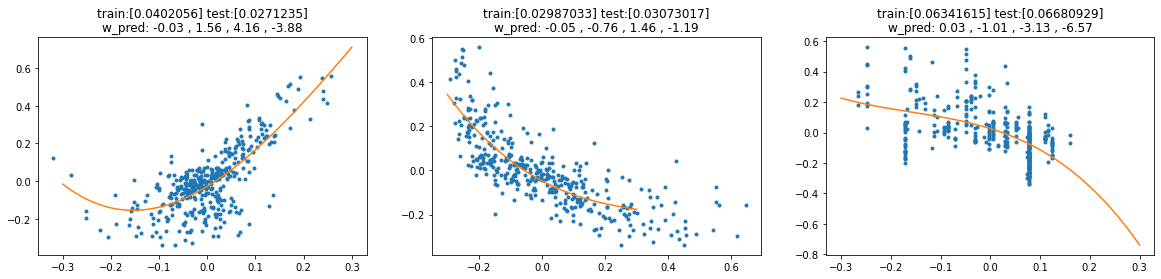

---------------------------------------------------------------
fold number:  2


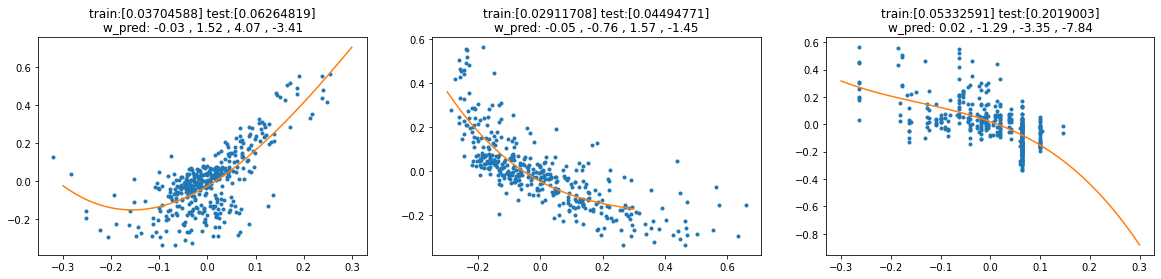

---------------------------------------------------------------
fold number:  3


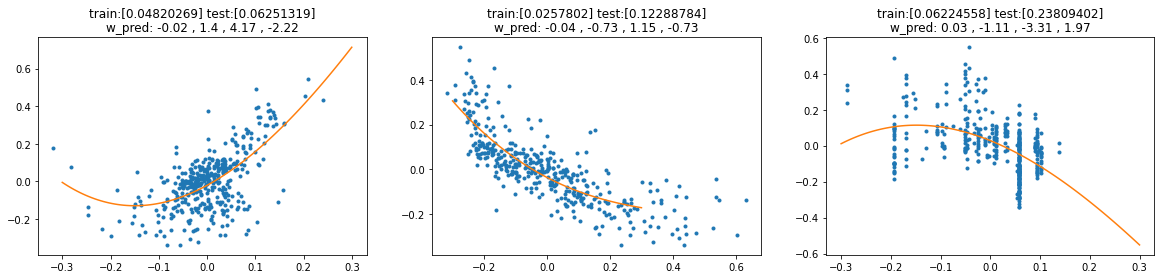

---------------------------------------------------------------
fold number:  4


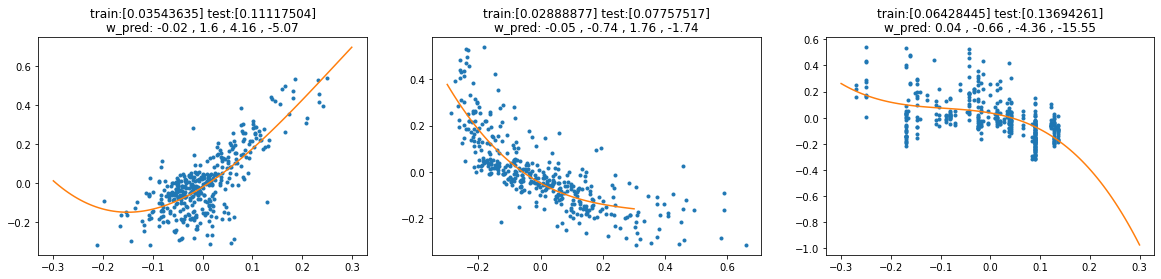

---------------------------------------------------------------
fold number:  5


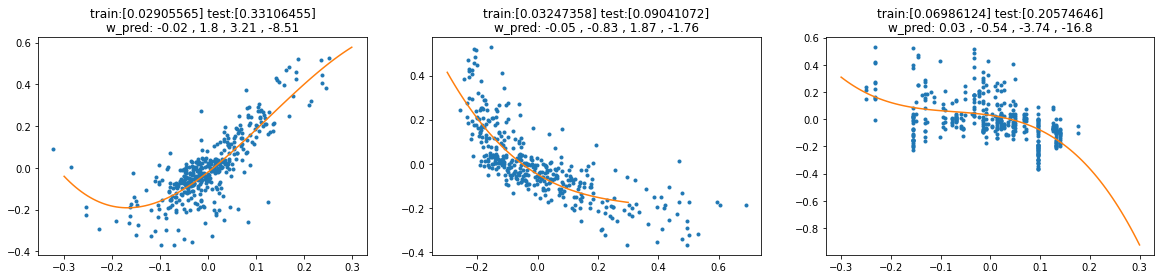

---------------------------------------------------------------


In [125]:
poly_reg=poly_regression()
poly_reg.regression_k_fold_single_feature(x,y,0.2,5,3)

fold number:  1


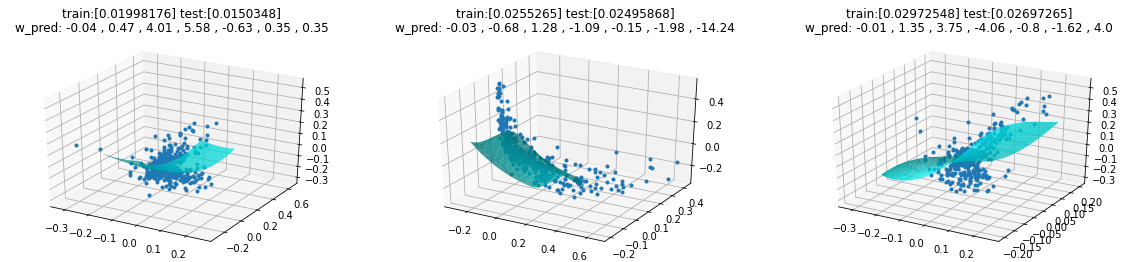

---------------------------------------------------------------
fold number:  2


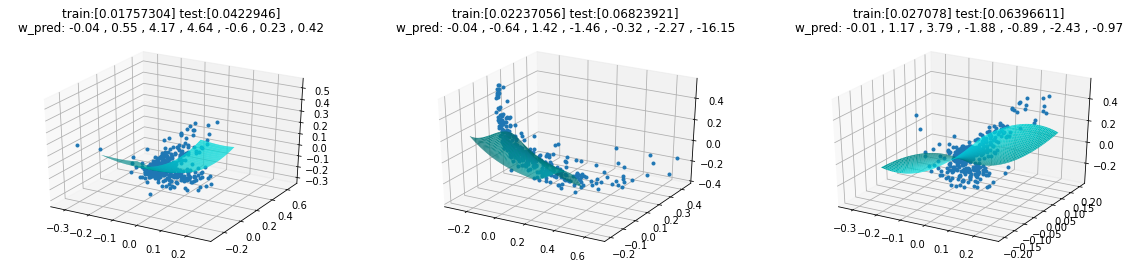

---------------------------------------------------------------
fold number:  3


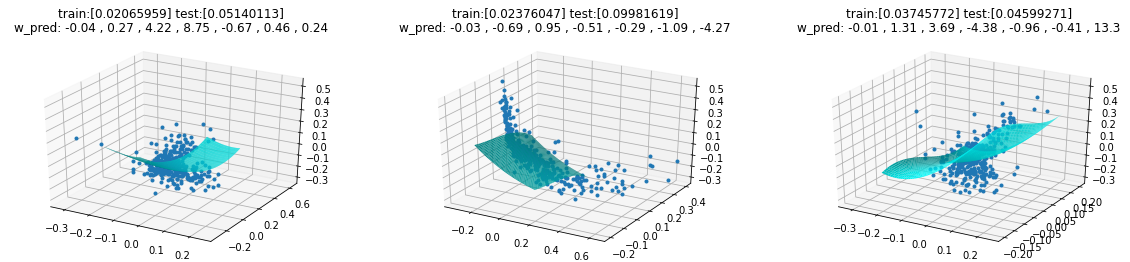

---------------------------------------------------------------
fold number:  4


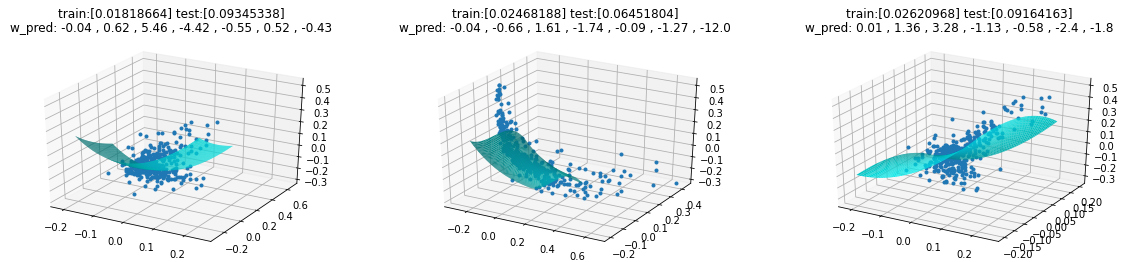

---------------------------------------------------------------
fold number:  5


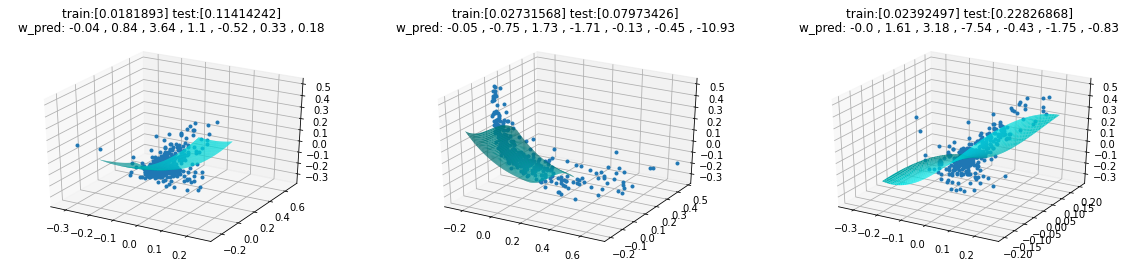

---------------------------------------------------------------


In [126]:
poly_reg=poly_regression()
poly_reg.regression_k_fold_double_feature(x,y,0.2,5,3)

fold number:  1


<Figure size 432x288 with 0 Axes>

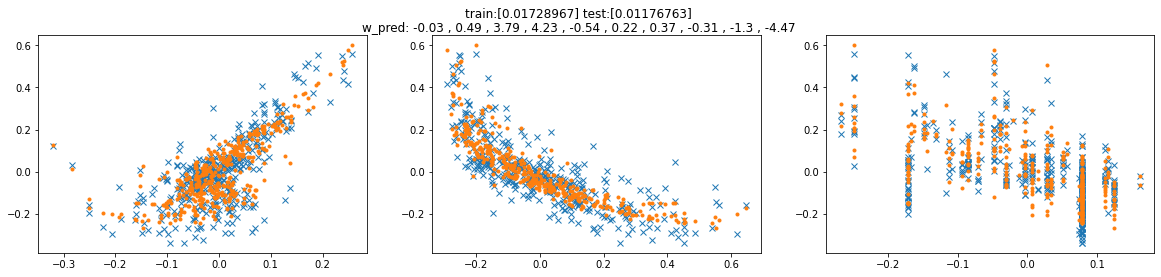

---------------------------------------------------------------
fold number:  2


<Figure size 432x288 with 0 Axes>

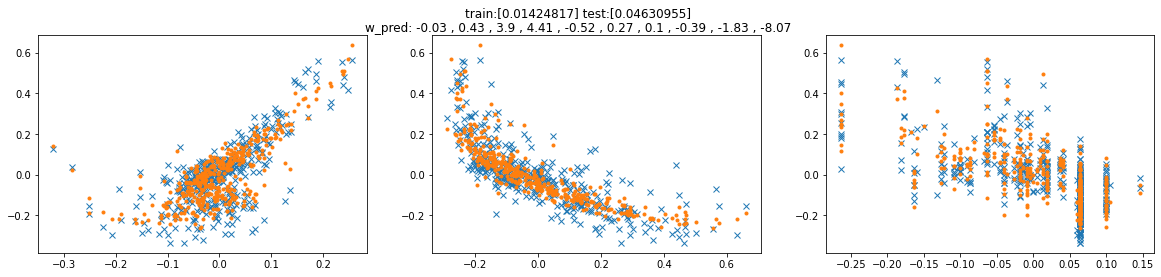

---------------------------------------------------------------
fold number:  3


<Figure size 432x288 with 0 Axes>

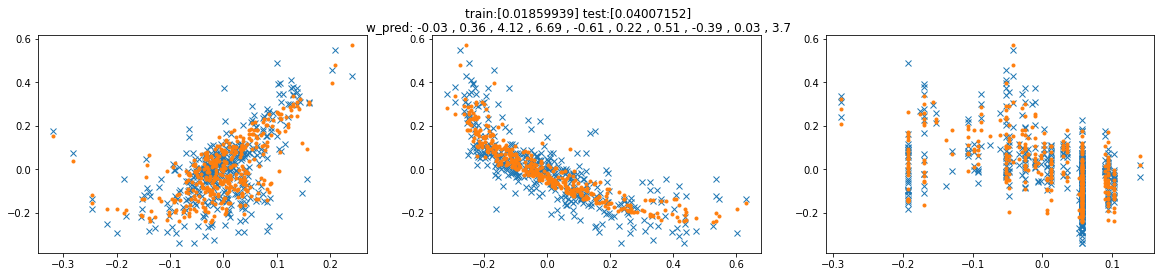

---------------------------------------------------------------
fold number:  4


<Figure size 432x288 with 0 Axes>

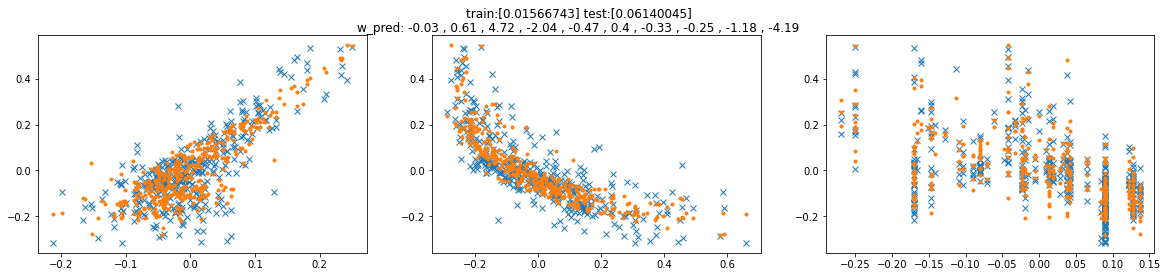

---------------------------------------------------------------
fold number:  5


<Figure size 432x288 with 0 Axes>

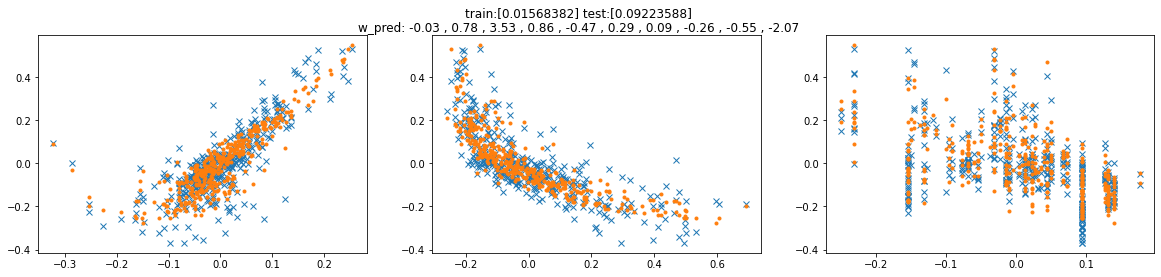

---------------------------------------------------------------


In [127]:
poly_reg=poly_regression()
poly_reg.regression_k_fold_triple_feature(x,y,0.2,5,3)